# Installing libraries

To install all the dependencies we will use the `requirements.txt` file from the project repository [repository](https://github.com/NikJamnik/capstone_medical_chat_bot)

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving requirements.txt to requirements.txt


In [3]:
!pip install -r requirements.txt > /dev/null 2>&1

# Generating synthetic dataset

We will generate a set of 104 pairs of questions and answers with ChatGPT-4o. Every pair will belong to one out of eight topics (conditions):
- acne
- eczema
- psoriasis
- melanoma
- rosacea
- fungal infections
- sunburn
- alopecia

In [4]:
import pandas as pd

In [5]:
qa_data = {
    "acne": [
        ("What causes acne?", "Acne is caused by clogged hair follicles due to oil, bacteria, and dead skin."),
        ("What types of acne exist?", "Types include whiteheads, blackheads, papules, pustules, nodules, and cysts."),
        ("Can hormonal changes cause acne?", "Yes, puberty, menstruation, and hormonal imbalances can trigger acne."),
        ("How is teenage acne different from adult acne?", "Teenage acne is often oilier and on the T-zone; adult acne is deeper and on the lower face."),
        ("Do greasy foods cause acne?", "Not directly, but high-glycemic diets can contribute."),
        ("Can stress worsen acne?", "Yes, stress increases hormones that can worsen acne."),
        ("Is acne contagious?", "No, acne is not infectious."),
        ("How does benzoyl peroxide work?", "It kills bacteria and helps remove dead skin cells."),
        ("When should you see a dermatologist for acne?", "If over-the-counter treatments don’t work after 2–3 months."),
        ("Are acne scars permanent?", "Some may be, but treatments like laser therapy and peels can help."),
        ("Does sun exposure help acne?", "Sun may dry out pimples temporarily but worsens skin damage long term."),
        ("Is it okay to pop pimples?", "No, it increases risk of scarring and infection."),
        ("What is isotretinoin used for?", "It's a strong oral medication for severe acne."),
    ],
    "eczema": [
        ("What is eczema?", "Eczema is a chronic skin condition causing redness, itching, and dryness."),
        ("What triggers eczema flare-ups?", "Triggers include stress, allergens, irritants, and climate."),
        ("Can eczema affect children?", "Yes, it's common in infants and often improves with age."),
        ("Is eczema related to allergies?", "Yes, it often occurs with asthma and hay fever."),
        ("What are the types of eczema?", "Types include atopic dermatitis, contact dermatitis, and dyshidrotic eczema."),
        ("Is there a cure for eczema?", "No cure exists, but symptoms can be managed."),
        ("Why is moisturizing important for eczema?", "It strengthens the skin barrier and reduces flare-ups."),
        ("What medications are used for eczema?", "Topical steroids, antihistamines, and immunomodulators."),
        ("Can eczema be managed without steroids?", "Yes, with moisturizers, trigger avoidance, and barrier creams."),
        ("Does eczema affect sleep?", "Yes, itching can interfere with sleep."),
        ("Can food allergies worsen eczema?", "In some individuals, yes."),
        ("Can eczema cause skin infections?", "Yes, due to scratching and barrier damage."),
        ("Does eczema leave scars?", "Usually not, unless scratched excessively."),
    ],
    "psoriasis": [
        ("What is psoriasis?", "Psoriasis is an autoimmune skin disease causing red, scaly plaques."),
        ("Is psoriasis contagious?", "No, it's not contagious."),
        ("What triggers psoriasis flares?", "Stress, infections, cold weather, and certain medications."),
        ("What types of psoriasis exist?", "Plaque, guttate, inverse, pustular, and erythrodermic."),
        ("Can psoriasis affect joints?", "Yes, in the form of psoriatic arthritis."),
        ("How is psoriasis diagnosed?", "Typically by clinical exam and skin biopsy."),
        ("What are common treatments?", "Topicals, phototherapy, biologics, and oral meds."),
        ("What are biologic drugs?", "Targeted therapies that modulate the immune system."),
        ("Can diet help with psoriasis?", "Some patients benefit from anti-inflammatory diets."),
        ("Does smoking affect psoriasis?", "Yes, it can worsen symptoms."),
        ("Is psoriasis genetic?", "There is a hereditary component."),
        ("Can psoriasis go into remission?", "Yes, but it can relapse."),
        ("How does UV light help?", "It slows down excessive skin cell turnover."),
    ],
    "melanoma": [
        ("What is melanoma?", "A serious skin cancer originating from melanocytes."),
        ("What are signs of melanoma?", "Asymmetry, border irregularity, color changes, large diameter, evolving."),
        ("How is melanoma diagnosed?", "Through skin biopsy and pathological analysis."),
        ("What causes melanoma?", "UV exposure, genetics, and having many moles."),
        ("How is early melanoma treated?", "Usually surgical excision with clear margins."),
        ("Can melanoma spread?", "Yes, it can metastasize to organs."),
        ("Is melanoma curable?", "Yes, if caught early."),
        ("What is the ABCDE rule?", "A guide for checking suspicious moles."),
        ("Are dark-skinned people immune?", "No, but risk is lower."),
        ("Does sunscreen prevent melanoma?", "Yes, by blocking harmful UV rays."),
        ("What is stage IV melanoma?", "Advanced melanoma that has spread distantly."),
        ("How is advanced melanoma treated?", "With immunotherapy or targeted therapy."),
        ("Can melanoma recur?", "Yes, regular follow-up is essential."),
    ],
    "rosacea": [
        ("What is rosacea?", "A chronic skin condition causing redness and visible vessels on the face."),
        ("What triggers rosacea?", "Hot drinks, spicy food, alcohol, sun, and stress."),
        ("Can rosacea cause eye problems?", "Yes, ocular rosacea causes dry, irritated eyes."),
        ("Is rosacea the same as acne?", "No, though it may cause acne-like bumps."),
        ("Is rosacea curable?", "No, but it can be managed."),
        ("What treatments are used?", "Topical metronidazole, oral antibiotics, and laser therapy."),
        ("Is rosacea genetic?", "Family history may play a role."),
        ("Can makeup worsen rosacea?", "Yes, especially fragranced or alcohol-based products."),
        ("Does alcohol worsen rosacea?", "Yes, especially red wine."),
        ("Can sun exposure trigger it?", "Yes, it's a common trigger."),
        ("Is rosacea more common in women?", "Yes, but men often have more severe symptoms."),
        ("How is it diagnosed?", "By clinical exam based on symptoms."),
        ("Does diet affect rosacea?", "Yes, triggers vary by person."),
    ],
    "fungal infections": [
        ("What causes ringworm?", "A fungal infection of the skin."),
        ("Is ringworm contagious?", "Yes, through contact with infected skin or surfaces."),
        ("How is athlete’s foot treated?", "With topical or oral antifungals."),
        ("Can yeast cause skin infections?", "Yes, Candida can cause rashes."),
        ("What are symptoms of fungal skin infections?", "Red, itchy, scaly or cracked skin."),
        ("Can pets transmit ringworm?", "Yes, especially cats and dogs."),
        ("Do fungal infections affect nails?", "Yes, causing discoloration and thickening."),
        ("What is tinea versicolor?", "A fungal infection causing skin discoloration."),
        ("Can fungi infect the scalp?", "Yes, especially in children."),
        ("Is humid weather a risk?", "Yes, fungi thrive in moist environments."),
        ("Can antifungal creams cure infections?", "Yes, for most superficial infections."),
        ("Are fungal infections recurrent?", "Yes, especially in diabetics or immunocompromised."),
        ("Should infected items be disinfected?", "Yes, wash clothes and surfaces."),
    ],
    "sunburn": [
        ("What is sunburn?", "Skin damage caused by excessive UV exposure."),
        ("What are symptoms of sunburn?", "Redness, pain, swelling, and peeling."),
        ("How to treat sunburn?", "Cool compresses, aloe vera, fluids, and NSAIDs."),
        ("How long does sunburn last?", "Typically 3–7 days."),
        ("Does sunburn increase cancer risk?", "Yes, especially repeated severe burns."),
        ("Can dark skin get sunburned?", "Yes, though less likely."),
        ("Does sunscreen prevent sunburn?", "Yes, SPF 30+ is recommended."),
        ("What is SPF?", "Sun Protection Factor, indicating how well sunscreen blocks UVB."),
        ("Can you get sunburn on cloudy days?", "Yes, up to 80% of UV penetrates clouds."),
        ("Can medications increase sunburn risk?", "Yes, some cause photosensitivity."),
        ("Is peeling normal?", "Yes, it's part of healing."),
        ("Should you pop sunburn blisters?", "No, it increases infection risk."),
        ("How often should sunscreen be reapplied?", "Every 2 hours or after swimming."),
    ],
    "alopecia": [
        ("What is alopecia areata?", "An autoimmune condition causing patchy hair loss."),
        ("What causes hair loss?", "Genetics, hormones, stress, medications, and illness."),
        ("Can alopecia be permanent?", "Some forms are reversible, others like scarring alopecia are not."),
        ("What is telogen effluvium?", "Temporary shedding often due to stress or illness."),
        ("Is alopecia genetic?", "Some types have a genetic component."),
        ("Can nutrition affect hair?", "Yes, deficiencies in iron, protein, or biotin can cause loss."),
        ("What treatments exist?", "Steroid injections, minoxidil, or immunotherapy."),
        ("Can hair regrow after alopecia?", "Yes, depending on the type and severity."),
        ("Does alopecia affect eyebrows or eyelashes?", "Yes, in some cases."),
        ("Is hair loss in women common?", "Yes, especially after pregnancy or menopause."),
        ("Does thyroid disease cause hair loss?", "Yes, both hyper- and hypothyroidism."),
        ("Can fungal infections cause bald spots?", "Yes, especially tinea capitis."),
        ("Is alopecia contagious?", "No, it is not."),
    ]
}

qa_flat = []
for condition, pairs in qa_data.items():
    for q, a in pairs:
        qa_flat.append({
            "condition": condition,
            "question": q,
            "answer": a
        })

qa_df = pd.DataFrame(qa_flat)
qa_df.head()

,condition,question,answer
0,acne,What causes acne?,Acne is caused by clogged hair follicles due t...
1,acne,What types of acne exist?,"Types include whiteheads, blackheads, papules,..."
2,acne,Can hormonal changes cause acne?,"Yes, puberty, menstruation, and hormonal imbal..."
3,acne,How is teenage acne different from adult acne?,Teenage acne is often oilier and on the T-zone...
4,acne,Do greasy foods cause acne?,"Not directly, but high-glycemic diets can cont..."


# Accuracy Experiment

## Setting secret keys

In [6]:
import os
from getpass import getpass

In [7]:
os.environ["OPENAI_API_KEY"] = getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [8]:
os.environ["PINECONE_ENVIRONMENT"] = 'us-east-1'

In [9]:
os.environ["PINECONE_API_KEY"] = getpass("Enter your Pinecone API key: ")

Enter your Pinecone API key: ··········


## Creating Pinecone Index

In [10]:
from pinecone import Pinecone, ServerlessSpec

In [12]:
pinecone_key = os.environ["PINECONE_API_KEY"]
region = os.environ["PINECONE_ENVIRONMENT"]
index_name = "dermatology-rag"

pc = Pinecone(api_key = pinecone_key)

if index_name in pc.list_indexes().names():
    pc.delete_index(index_name)
    print(f"🗑️ Index '{index_name}' deleted.")
else:
    print(f"ℹ️ Index '{index_name}' does not exist.")

if index_name not in pc.list_indexes().names():
    pc.create_index(
        name = index_name,
        dimension = 768,
        metric = "cosine",
        spec = ServerlessSpec(
            cloud = "aws",
            region = region
        )
    )
    print(f"✅ Created index '{index_name}' in region '{region}'")
else:
    print(f"ℹ️ Index '{index_name}' already exists.")

🗑️ Index 'dermatology-rag' deleted.
✅ Created index 'dermatology-rag' in region 'us-east-1'


## Loading the book and splitting to chunks

In [13]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [14]:
pdf_path = "ClinicalDermatology.pdf"
!wget -O {pdf_path} https://webicdn.com/sdirmember/14/13336/produk/ClinicalDermatology.pdf

loader = PyPDFLoader(pdf_path)
pages = loader.load()

splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 100)
chunks = splitter.split_documents(pages)

print(f"✅ Split into {len(chunks)} chunks.")

--2025-04-20 09:41:54--  https://webicdn.com/sdirmember/14/13336/produk/ClinicalDermatology.pdf
Resolving webicdn.com (webicdn.com)... 172.67.213.152, 104.21.35.45, 2606:4700:3032::ac43:d598, ...
Connecting to webicdn.com (webicdn.com)|172.67.213.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33398736 (32M) [application/pdf]
Saving to: ‘ClinicalDermatology.pdf’

ClinicalDermatology 100%[===================>]  31.85M   101MB/s    in 0.3s    

2025-04-20 09:41:55 (101 MB/s) - ‘ClinicalDermatology.pdf’ saved [33398736/33398736]

✅ Split into 2433 chunks.


In [15]:
from langchain_community.embeddings import HuggingFaceEmbeddings

In [16]:
embedding = HuggingFaceEmbeddings(model_name = "sentence-transformers/all-mpnet-base-v2")

<ipython-input-16-31aad403d099>:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name = "sentence-transformers/all-mpnet-base-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
from langchain_pinecone import PineconeVectorStore
from pinecone import Pinecone

In [18]:
index_name = "dermatology-rag"
namespace = "med_bot"

vectorstore = PineconeVectorStore(
    index_name = index_name,
    embedding = embedding,
    namespace = namespace
)

In [19]:
from tqdm import tqdm

In [20]:
batch_size = 100

for i in tqdm(range(0, len(chunks), batch_size)):
    batch = chunks[i:i+batch_size]
    vectorstore.add_documents(documents=batch)

print("✅ All chunks uploaded to Pinecone!")

100%|██████████| 25/25 [22:15<00:00, 53.42s/it]

✅ All chunks uploaded to Pinecone!


## Conducting experiment

To compare RAG and LLM we will use two metrics:
- `faithfulness` - measures how well the generated answer aligns with the ground truth (semantic similarity)
- `answer relevancy` - measures how relevant the generated answer is to the original question (regardless of correctness)

In [21]:
from datasets import Dataset
from ragas import evaluate
from ragas.metrics import faithfulness, answer_relevancy, context_precision, context_recall
from langchain.chains import RetrievalQA
from langchain_openai import ChatOpenAI

In [22]:
sample_df = qa_df.sample(20, random_state = 42)
rag_inputs = []
llm_inputs = []

# RAG: GPT-3.5 + vectorstore
rag_llm = ChatOpenAI(model = "gpt-3.5-turbo", temperature = 0)
retriever = vectorstore.as_retriever()
rag_chain = RetrievalQA.from_chain_type(llm = rag_llm, retriever = retriever, return_source_documents = True)

# LLM-only: GPT-3.5 no context
llm_only = ChatOpenAI(model = "gpt-3.5-turbo", temperature = 0)

In [24]:
# Here we will get responses for RAG and for LLM
for _, row in sample_df.iterrows():
    q = row["question"]
    ground_truth = row["answer"]

    rag_result = rag_chain.invoke({"query": q})
    rag_context = "\n".join([doc.page_content for doc in rag_result["source_documents"]])

    rag_inputs.append({
        "question": q,
        "answer": rag_result["result"],
        "contexts": [rag_context],
        "ground_truth": ground_truth
    })

    llm_response = llm_only.predict(q)
    llm_inputs.append({
        "question": q,
        "answer": llm_response,
        "contexts": [""],  # no context
        "ground_truth": ground_truth
    })

<ipython-input-24-3558ddb99709>:16: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  llm_response = llm_only.predict(q)


In [25]:
import json

In [26]:
# Save RAG responses
with open("rag_inputs.json", "w") as f:
    json.dump(rag_inputs, f, indent = 2)

# Save LLM-only responses
with open("llm_inputs.json", "w") as f:
    json.dump(llm_inputs, f, indent = 2)

print("✅ Saved RAG and LLM-only responses to JSON.")

✅ Saved RAG and LLM-only responses to JSON.


In [27]:
# RAG evaluation: all metrics
rag_dataset = Dataset.from_list(rag_inputs)
rag_result = evaluate(
    rag_dataset,
    metrics=[faithfulness, answer_relevancy, context_precision, context_recall]
)

# LLM-only evaluation: only applicable metrics
llm_dataset = Dataset.from_list(llm_inputs)
llm_result = evaluate(
    llm_dataset,
    metrics=[faithfulness, answer_relevancy]  # ❌ no context metrics
)

Evaluating:   0%|          | 0/80 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

In [29]:
import matplotlib.pyplot as plt
import numpy as np

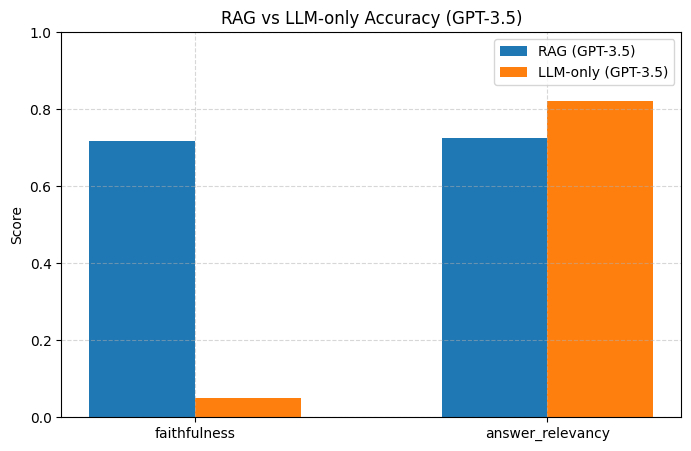

In [33]:
metrics = ["faithfulness", "answer_relevancy"]

rag_scores = [np.mean(rag_result[m]) for m in metrics]
llm_scores = [np.mean(llm_result[m]) for m in metrics]

x = range(len(metrics))

plt.figure(figsize=(8, 5))
plt.bar(x, rag_scores, width=0.3, label="RAG (GPT-3.5)", align='center')
plt.bar([i + 0.3 for i in x], llm_scores, width=0.3, label="LLM-only (GPT-3.5)", align='center')
plt.xticks([i + 0.15 for i in x], metrics)
plt.ylabel("Score")
plt.title("RAG vs LLM-only Accuracy (GPT-3.5)")
plt.legend()
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("rag_vs_llm_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()


In [31]:
print(rag_scores)

[np.float64(0.7179545454545455), np.float64(0.7263195949418968)]


In [32]:
print(llm_scores)

[np.float64(0.05), np.float64(0.8203373525179423)]


## Faithfulness
RAG = 0.71, LLM = 0.05

- Faithfulness evaluates how closely the generated answer matches the reference answer (ground truth)

- RAG uses the book context, so it has access to medically accurate answers — making its output more aligned with the expected answer

- LLM-only has no context, so it's likely hallucinating or guessing, leading to low semantic similarity with the correct answer


## Answer Relevancy
RAG = 0.72, LLM = 0.82

- This metric checks whether the answer is on topic — relevant to the question, regardless of correctness

- LLMs are very good at sounding plausible and being on-topic, even if the answer is wrong.

- So the LLM may be confidently wrong, but still relevant in form and flow.

- RAG answers might sometimes be more fragmented or pulled from dense text, reducing perceived "relevance"